# 1. Plotting Pauli-Dirac and Bose-Einstein Distributions

In [11]:
import numpy as np                  # common math functions
import matplotlib.pyplot as plt     # commonly used plotting library 
%matplotlib inline

In [8]:
# My costumizations for plots
import matplotlib.ticker as tck
import matplotlib.font_manager
from matplotlib import rc
rc('font',**{'family':'serif', 'serif':['Computer Modern Roman']})
rc('text', usetex=True)

def get_cmap(n: int, name: str='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def costumize_axis(ax: plt.Axes, x_title: str, y_title: str):
    ax.set_xlabel(x_title, fontsize=24)
    ax.set_ylabel(y_title, fontsize=24)
    ax.tick_params(axis='both', labelsize=18, top=True, right=True)
    ax.tick_params(axis='both', which='major', direction='in', length=8)
    ax.xaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.yaxis.set_minor_locator(tck.AutoMinorLocator())
    ax.tick_params(axis='both', which='minor', direction='in', length=4, top=True, right=True)
    return ax

In [19]:
def pauli_dirac_distribuion(temperature, energy):
    return 1.0 / (np.exp(energy / temperature) + 1.0)

def bose_einstein_distribution(temperature, energy):
    return 1.0 / (np.exp(energy / temperature) - 1.0)

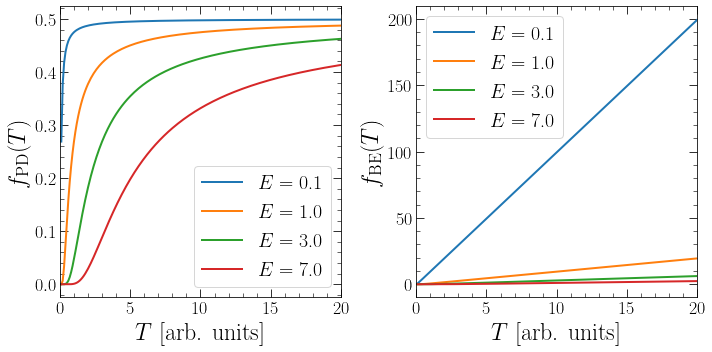

In [24]:
# plot Pauli Dirac Dist
energy = np.array([0.1, 1, 3, 7])
temperature = np.linspace(0.1, 20, 200)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
fig.patch.set_facecolor('white')
cmap = get_cmap(10, 'tab10')
for i, e in enumerate(energy): 
    ax[0].plot(temperature, pauli_dirac_distribuion(temperature, e), linewidth=2, color=cmap(i), label=(r'$E=$ '+f'{e}'))
    ax[1].plot(temperature, bose_einstein_distribution(temperature, e), linewidth=2, color=cmap(i), label=(r'$E=$ '+f'{e}'))
    
# modify first axis
ax[0].set_xlim(0,20)
ax[0].legend(loc='lower right', fontsize=20)
costumize_axis(ax[0], r'$T$ [arb. units]', r'$f_\mathrm{PD}(T)$')

# modify second axis
ax[1].set_xlim(0,20)
ax[1].legend(loc='upper left', fontsize=20)
costumize_axis(ax[1], r'$T$ [arb. units]', r'$f_\mathrm{BE}(T)$')

fig.tight_layout()
fig.savefig('plots/thermal_dists.pdf')